### MR SAM'S PROJECT 

# Exploring Twitter data: Sentiment Analysis of xenophobia tweets

To carry out this project, we're going to analyze tweets in order to gain insight about a particular term on Twitter.

## Initial Setup

This script is using Python 3.7 .
Before starting, make sure you have the Twitter API credentials, obtainable here https://apps.twitter.com/.

I've set up a file that will store the Twitter API credentials. This file is to be set to be ignore by the source control we're using so as not to commit it by error (and expose it).

The **credentials.ini** file I've set up looks as follows:

In [1]:
import configparser
CONFIG = configparser.ConfigParser()
CONFIG.read('credentials.ini')

['credentials.ini']

## Get Twitter data

We're going to need to access the Twitter APIs in order to get tweet data. Several options are available, both free and paid. A detailed explanation of options is available here: https://developer.twitter.com/en/docs/tweets/search/overview 

In this proof of concept we'll be using the free version of the Twitter Search API, which as per the below site performs
> searches against a sampling of recent Tweets published in the past 7 days. Part of the 'public' set of APIs.

This should be enough for our needs for now. Moving forward, we could either decide between making the API calls directly or using a library that will do so for us. Given the vast choice the Python ecosystem gives us, we're going to use [TwitterSearch](https://pypi.org/project/TwitterSearch/), which should help us get started quicker.
After pip-installing TwitterSearch, we're ready to go.

In [2]:
from TwitterSearch import TwitterSearch, TwitterSearchOrder, TwitterSearchException

We will instantiate the TwitterSearch object that will be our entry point to the API

In [3]:
ts = TwitterSearch(access_token=CONFIG['DEFAULT']['access_token'], #your access token
                       access_token_secret=CONFIG['DEFAULT']['access_token_secret'], #your access token secret
                       consumer_key=CONFIG['DEFAULT']['consumer_key'], #your consumer key
                       consumer_secret=CONFIG['DEFAULT']['consumer_secret']) # your consumer secret

We'll now need to create a Search Order against the Search object we've defined above.

In [4]:
tso = TwitterSearchOrder()

Say we're interested in tweets about the recent xenophobia in southafrica

In [5]:
xeno_keywords, language = ['xenophobia'], 'en'
south_keywords, language = ['southafrica'], 'en'

We'll instantiate a list to store the results:

In [6]:
results = []

Now, we'll set up the search order we've created earlier, and pass in the keyword for xenophobia

In [7]:
tso.remove_all_filters() #remove all previously set filters
tso.set_result_type('recent') #you can choose between popular, recent or mixed tweets
tso.set_keywords(xeno_keywords) # previously defined keywords
tso.set_language(language) # en = english, de = german, ru=russian and so on
tso.set_include_entities(False) #entities provide additional metadata

The search object will now get executed and will return an iterable of result, which we'll store in the list we've previously instantiated

In [8]:
for tweet in ts.search_tweets_iterable(tso):
    results.append(tweet)

Next, we will do the same for the term/keyword southafrica

In [9]:
tso.remove_all_filters() #remove all previously set filters
tso.set_result_type('recent') #you can choose between popular, recent or mixed tweets
tso.set_keywords(south_keywords) # previously defined keywords
tso.set_language(language) # en = english, de = german, ru=russian and so on
tso.set_include_entities(False) #entities provide additional metadata

In [10]:
for tweet in ts.search_tweets_iterable(tso):
    results.append(tweet)

Now we have a list of tweets, which look like the following.
We could see that we have a nested dictionary-like structure containing other dictionaries, lists. This needs to be flattened out se we could analyze data more efficiently.

In [11]:
results[0]

{'created_at': 'Tue Jan 21 20:37:25 +0000 2020',
 'id': 1219720675797041152,
 'id_str': '1219720675797041152',
 'text': 'RT @vijaita: Dear rest of India, all Bengali speaking people are not Bangladeshis! They could be from Assam, Meghalaya, Tripura, West Benga…',
 'truncated': False,
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 384314150,
  'id_str': '384314150',
  'name': 'حشمت الصديق',
  'screen_name': 'Hashmathmaimi',
  'location': 'المكان المقصود الجنة الفردوس',
  'description': '| Citizens Journalist | | Teacher | | Entrepreneur| | Visionary | | MTKNWGL | | 4 🌟 Project |',
  'url': 'https://t.co/0by02y7Yjo',
  'entities': {'url': {'urls': [{'url': 'https://t.co/0by02y7Yjo',
      'ex

We're going to use the pandas library for flattening this data

In [14]:
import pandas as pd

In [15]:
df = pd.io.json.json_normalize(results)

These are the column names for the data we've obtained.

In [16]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'quoted_status.place.country', 'quoted_status.place.contained_within',
       'quoted_status.place.bounding_box.type',
       'quoted_status.place.bounding_box.coordinates', 'withheld_in_countries',
       'user.withheld_in_countries', 'geo.type', 'geo.coordinates',
       'coordinates.type', 'coordinates.coordinates'],
      dtype='object', length=324)

Here's a view of our data

In [17]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,withheld_in_countries,user.withheld_in_countries,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
0,Tue Jan 21 20:37:25 +0000 2020,1219720675797041152,1219720675797041152,"RT @vijaita: Dear rest of India, all Bengali s...",False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Jan 21 20:36:18 +0000 2020,1219720397387513856,1219720397387513856,the xenophobia in the replies makes me sad htt...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Jan 21 20:36:07 +0000 2020,1219720349467709442,1219720349467709442,"RT @PlisskenVon: Meanwhile, the left have weap...",False,"<a href=""https://twitterrific.com/ios"" rel=""no...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Jan 21 20:35:08 +0000 2020,1219720100997222402,1219720100997222402,@mkasim_13 @ScottySacam97 Yes because finding ...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219719e+18,1219719138651922433,1.215362e+18,1215362483080323079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Jan 21 20:34:33 +0000 2020,1219719957065261056,1219719957065261056,Know how sometimes you see shocking amounts of...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To give a more meaningful identifier to each row than the currently used automatically generated row number, we're going to use the unique tweet id column. We're also going to drop the 'id_str' columns since it's the string representation of the same tweet id.

In [18]:
df.set_index('id',drop=True,inplace=True)
df.drop('id_str',axis=1,inplace=True)

Our dataframe now looks like this:

In [19]:
df.head()

,created_at,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,...,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,withheld_in_countries,user.withheld_in_countries,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates
id,,,,,,,,,,,,,,,,,,,,,
1219720675797041152,Tue Jan 21 20:37:25 +0000 2020,"RT @vijaita: Dear rest of India, all Bengali s...",False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219720397387513856,Tue Jan 21 20:36:18 +0000 2020,the xenophobia in the replies makes me sad htt...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219720349467709442,Tue Jan 21 20:36:07 +0000 2020,"RT @PlisskenVon: Meanwhile, the left have weap...",False,"<a href=""https://twitterrific.com/ios"" rel=""no...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219720100997222402,Tue Jan 21 20:35:08 +0000 2020,@mkasim_13 @ScottySacam97 Yes because finding ...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219719e+18,1219719138651922433,1.215362e+18,1215362483080323079,mkasim_13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1219719957065261056,Tue Jan 21 20:34:33 +0000 2020,Know how sometimes you see shocking amounts of...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A view of a subset of columns would be useful here. Let's look at the date the tweet was created, the user screen name and the text of the tweet.

In [20]:
df[['created_at', 'user.screen_name', 'text']].head()

,created_at,user.screen_name,text
id,,,
1219720675797041152,Tue Jan 21 20:37:25 +0000 2020,Hashmathmaimi,"RT @vijaita: Dear rest of India, all Bengali s..."
1219720397387513856,Tue Jan 21 20:36:18 +0000 2020,LVNTRHYUNJIN,the xenophobia in the replies makes me sad htt...
1219720349467709442,Tue Jan 21 20:36:07 +0000 2020,merc5555,"RT @PlisskenVon: Meanwhile, the left have weap..."
1219720100997222402,Tue Jan 21 20:35:08 +0000 2020,comets_shadows,@mkasim_13 @ScottySacam97 Yes because finding ...
1219719957065261056,Tue Jan 21 20:34:33 +0000 2020,JeremyMcGovern,Know how sometimes you see shocking amounts of...


Also, let's look at how much data we've got. This will return (no_of_rows (tweets), no_of_columns (features/variables) )

In [21]:
df.shape

(17998, 322)

In [22]:
df.to_csv('tweets_all.csv')

## Process data

Now let's look closer at our text.

In [24]:
df['text'].head(n=10)

id
1219720675797041152    RT @vijaita: Dear rest of India, all Bengali s...
1219720397387513856    the xenophobia in the replies makes me sad htt...
1219720349467709442    RT @PlisskenVon: Meanwhile, the left have weap...
1219720100997222402    @mkasim_13 @ScottySacam97 Yes because finding ...
1219719957065261056    Know how sometimes you see shocking amounts of...
1219719795865604096    RT @vijaita: Dear rest of India, all Bengali s...
1219719711577006081    RT @MrDominicBuxton: We send £350m to the EU e...
1219719625534926848    RT @vijaita: Dear rest of India, all Bengali s...
1219719600507482112    @Scavino45 @WhiteHouse @POTUS @realDonaldTrump...
1219719528776720390    @philipjdoyle @10DowningStreet @BorisJohnson @...
Name: text, dtype: object

There are several transformations we can apply to facilitate analysis of this text.

A first step would be excluding twitter handles '@user', new line characters '\n', whitespaces and hyperlinks.

Next step would be removing the stopwords - auxiliary words that can be ignored. We're going to use a predefined list of stopwords together with a couple of works such as retweet ('rt').

In [25]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blmalumi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords

In [27]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional) #big list containing all the stopwords + our additional ones

In [28]:
df.drop_duplicates(subset='text',inplace=True)

In [29]:
df.shape

(4371, 322)

In [30]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

Here's a list of words we're excluding:

In [31]:
swords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [32]:
df['processed_text'].head(n=10)

id
1219720675797041152    [dear, rest, india, bengali, speaking, people,...
1219720397387513856                    [xenophobia, replies, makes, sad]
1219720349467709442    [meanwhile, left, weaponised, racist, bigot, t...
1219720100997222402    [yes, finding, common, ground, neo, nazis, lik...
1219719957065261056    [know, sometimes, see, shocking, amounts, raci...
1219719711577006081    [send, 350m, eu, every, week, let, waste, 200b...
1219719600507482112    [trillion, dollar, deficit, spending, soldiers...
1219719528776720390                     [aim, reduce, yes, point, xenop]
1219719422941761537    [want, fight, back, rising, xenophobia, amp, d...
1219718705141166081                                   [expected, put, w]
Name: processed_text, dtype: object

Another transformation could be stemming the words. Think about 'play', 'played', 'plays', 'playing'. Since all of them represent the same idea, it would be nice to reduce them to the same concept and count together.

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [34]:
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [35]:
df['stemmed'].head(n=10)

id
1219720675797041152    [dear, rest, india, bengali, speak, peopl, ban...
1219720397387513856                       [xenophobia, repli, make, sad]
1219720349467709442    [meanwhil, left, weaponis, racist, bigot, tran...
1219720100997222402    [ye, find, common, ground, neo, nazi, like, tu...
1219719957065261056    [know, sometim, see, shock, amount, racism, ho...
1219719711577006081    [send, 350m, eu, everi, week, let, wast, 200bn...
1219719600507482112    [trillion, dollar, deficit, spend, soldier, wo...
1219719528776720390                       [aim, reduc, ye, point, xenop]
1219719422941761537    [want, fight, back, rise, xenophobia, amp, dis...
1219718705141166081                                     [expect, put, w]
Name: stemmed, dtype: object

### Score each tweet sentiment

The Vader Sentiment Analyzer will assign a polarity score to each provided tweet.

In [36]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\blmalumi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sia = vd.SentimentIntensityAnalyzer()

In [38]:
from nltk.tokenize import word_tokenize

In [39]:
df['sentiment_score'] = df['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [40]:
df[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
id,,
1219720675797041152,"[dear, rest, india, bengali, speaking, people,...",0.3818
1219720397387513856,"[xenophobia, replies, makes, sad]",-0.4767
1219720349467709442,"[meanwhile, left, weaponised, racist, bigot, t...",-0.6124
1219720100997222402,"[yes, finding, common, ground, neo, nazis, lik...",0.7631
1219719957065261056,"[know, sometimes, see, shocking, amounts, raci...",-1.0268
1219719711577006081,"[send, 350m, eu, every, week, let, waste, 200b...",-1.0464
1219719600507482112,"[trillion, dollar, deficit, spending, soldiers...",-0.4019
1219719528776720390,"[aim, reduce, yes, point, xenop]",0.4019
1219719422941761537,"[want, fight, back, rising, xenophobia, amp, d...",0.1358


Of course we should inspect the data in detail to see if we're happy with the way the Polarity Scoring has assigned sentiments to our tweets.

Now, we will try to visualize the split between attributed sentiments. As we can see, the term is quite contradictory with an almost even split beetween positive, negative and neutral sentiments.

In [41]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    2814
-1     999
 1     444
-2      87
 2      23
-3       3
-5       1
Name: sentiment_score, dtype: int64

In [42]:
df['user_audience_category'] = pd.cut(df['user.followers_count'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [43]:
df['user_audience_category'].head()

id
1219720675797041152     small
1219720397387513856    medium
1219720349467709442     small
1219720100997222402    medium
1219719957065261056    medium
Name: user_audience_category, dtype: category
Categories (3, object): [small < medium < wide]

# DATA VISUALIZATION

To visualiza the data the following libraries will be used.

In [119]:
#Visualisation
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib
# import seaborn as sns
# from IPython.display import display
# import os
# os.environ["PROJ_LIB"] = r'C:\Users\blmalumi\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap


### Geolocate tweets using location

Using the users' declared location, we're going to map the most frequent declared locations.

In [44]:
locs = df['user.location'].value_counts()
locs.drop('',inplace=True)
locs = locs[locs>=10]

In [45]:
mapping = {'London' : 'London, UK',
 'London, England': 'London, UK'  ,
 'United Kingdom' : 'United Kingdom',
 'England, United Kingdom': 'England' ,
 'UK': 'United Kingdom',
 'England': 'England',
 'Europe' : None ,
 'South East, England': 'South East England',
 'Scotland, United Kingdom' : 'Scotland',
 'Scotland': 'Scotland',
 'Ireland' : 'Ireland',
 'North West, England' : 'North West England',
 'London, UK': 'London, UK',
 'Manchester, England': 'Manchester, UK',
 'European Union': None,
 'North East, England': 'North East England',
 'Glasgow, Scotland': 'Glasgow, UK',
 'London ': 'London, UK',
 'European Union 🇪🇺' : None,
 'Wales, United Kingdom': 'Wales',
 'Rutland': 'Rutland, UK',
 'West Midlands, England' : 'West Midlands, UK',
 'East Midlands, England' : 'East Midlands, UK',
 'France': 'France',
 'Yorkshire and The Humber' : 'Yorkshire and The Humber, UK',
 'Sheffield, England' : 'Sheffield, UK',
 'South West, England' : 'South West England',
 'United States' : 'United States',
 'Oxford, England': 'Oxford, UK',
 'Reading, England': 'Reading, UK',
 'London UK': 'London, UK',
 'Kent' : 'Kent, UK',
 'Somerset' : 'Somerset, UK',
 'North London' : 'London, UK',
 'Wales': 'Wales',
 'Washington, DC' : 'Washington, DC',
 'Bristol, England' : 'Bristol, UK',
 'Edinburgh, Scotland' : 'Edinburgh, UK',
 'Glasgow' : 'Glasgow, UK',
 'Nottingham, England' : 'Nottingham, UK',
 'Liverpool, England' : 'Liverpool, UK',
 'Edinburgh' : 'Edinburgh, UK',
 'Belfast, Northern Ireland' : 'Belfast, UK',
 'Spain' : 'Spain',
 'Leeds, England' : 'Leeds, UK',
 'Milton Keynes, England' : 'Milton Keynes, UK',
 'Bracknell' : 'Bracknell, UK',
 'Leeds' : 'Leeds, UK',
 'City of London, London' : 'London, UK',
 'Cornwall' : 'Cornwall, UK' }

In [46]:
df['user.location'] =  df['user.location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )
df['user.location']

id
1219720675797041152     المكان المقصود الجنة الفردوس
1219720397387513856      Crying over taeyong~she/her
1219720349467709442       North Yorkshire, obviously
1219720100997222402                       Eastern MA
1219719957065261056    East of China West of Iceland
                                   ...              
1219679997339684864                      east london
1219679824236699649                                 
1219679790082461696                     South Africa
1219679711187652608                     South Africa
1219679630854164483                     South Africa
Name: user.location, Length: 4371, dtype: object

The Nominatim package allows us to get the coordinates of a city. The results show that the tweeters are overwhelmingly US-based.

In [47]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [48]:
locs = list(locs.index)

In [49]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis-cl')

In [50]:
geolocated = list(map(lambda x: [x,geolocator.geocode(x)[1] if geolocator.geocode(x) else None],locs))
geolocated = pd.DataFrame(geolocated)
print(geolocated)
#geolocated.dropna(subset = ['latlong'], inplace = True)


                             0                                  1
0                 South Africa           (-28.8166236, 24.991639)
1              London, England           (51.5073219, -0.1276474)
2                United States         (39.7837304, -100.4458825)
3                       London           (51.5073219, -0.1276474)
4   Johannesburg, South Africa               (-26.205, 28.049722)
5               United Kingdom           (54.7023545, -3.2765753)
6                       Canada         (61.0666922, -107.9917071)
7              California, USA         (36.7014631, -118.7559974)
8      Cape Town, South Africa            (-33.928992, 18.417396)
9                       Africa           (11.5024338, 17.7578122)
10     England, United Kingdom  (52.7954791, -0.5402402866174321)
11                         USA         (39.7837304, -100.4458825)
12                    Scotland           (56.7861112, -4.1140518)
13                 Seattle, WA         (47.6038321, -122.3300624)
14        

In [51]:
geolocated.columns = ['locat','latlong']


In [52]:
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['lon'] = geolocated.latlong.apply(lambda x: x[1])
geolocated.drop('latlong',axis=1, inplace=True)

In [53]:
mapdata = pd.merge(df,geolocated, how='inner', left_on='user.location', right_on='locat')

In [54]:
mapdata

,created_at,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,...,geo.coordinates,coordinates.type,coordinates.coordinates,processed_text,stemmed,sentiment_score,user_audience_category,locat,lat,lon
0,Tue Jan 21 20:29:35 +0000 2020,@distant_angel @TimAggettsport @RainbowWookey ...,True,"<a href=""http://twitter.com/download/iphone"" r...",1.219717e+18,1219717305405530112,6.281958e+07,62819585,distant_angel,NaN,...,NaN,NaN,NaN,"[expected, put, w]","[expect, put, w]",0.0000,medium,United Kingdom,54.702354,-3.276575
1,Tue Jan 21 20:01:03 +0000 2020,RT @Emmalouisajones: On from my Remainer/remoa...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,"[remainer, remoaner, definitions, ones, 2020, ...","[remain, remoan, definit, one, 2020, woke, off...",-0.8749,medium,United Kingdom,54.702354,-3.276575
2,Tue Jan 21 16:10:18 +0000 2020,RT @daphne_miles: @CarolineLucas @Scrabble817 ...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,"[totally, agree, caroline, kind, vile, country...","[total, agre, carolin, kind, vile, countri, be...",0.2630,medium,United Kingdom,54.702354,-3.276575
3,Tue Jan 21 16:03:24 +0000 2020,Managing xenophobia in the workplace https://t...,False,"<a href=""http://bmmagazine.co.uk/"" rel=""nofoll...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,"[managing, xenophobia, workplace]","[manag, xenophobia, workplac]",0.0000,wide,United Kingdom,54.702354,-3.276575
4,Tue Jan 21 12:31:30 +0000 2020,@ReaperSteven @CandaerReynolds @june_mummery I...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219597e+18,1219596961919242242,2.403078e+08,240307801,ReaperSteven,NaN,...,NaN,NaN,NaN,"[think, talking, xenophobia, certainly, racism]","[think, talk, xenophobia, certainli, racism]",-0.2849,wide,United Kingdom,54.702354,-3.276575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Sun Jan 19 16:50:37 +0000 2020,@pjmnprint @tendaemini @rkivelost The only thi...,True,"<a href=""http://twitter.com/download/android"" ...",1.218814e+18,1218813530939457536,1.130081e+18,1130080503963500545,pjmnprint,NaN,...,NaN,NaN,NaN,"[thing, proves, kpop, major, industry, korea]","[thing, prove, kpop, major, industri, korea]",0.0000,medium,Brasil,-10.333333,-53.200000
500,Sun Jan 19 16:48:00 +0000 2020,@SarahAye24 @smol309 Beloved I'm army and my p...,True,"<a href=""http://twitter.com/download/android"" ...",1.218820e+18,1218819782675333121,8.321518e+17,832151788945944576,SarahAye24,NaN,...,NaN,NaN,NaN,"[beloved, army, point, dismissing, entire, ind...","[belov, armi, point, dismiss, entir, industri,...",0.5106,medium,Brasil,-10.333333,-53.200000
501,Sun Jan 19 06:16:52 +0000 2020,@sadaboutbts This is just historical fact. Y'a...,True,"<a href=""http://twitter.com/download/android"" ...",1.218778e+18,1218777733217558528,7.983437e+17,798343693895954436,sadaboutbts,NaN,...,NaN,NaN,NaN,"[historical, fact, reproducing, western, gp, x...","[histor, fact, reproduc, western, gp, xenophob...",0.0000,medium,Brasil,-10.333333,-53.200000
502,Sat Jan 18 23:17:05 +0000 2020,@kimvyoon Lmao if you think respecting BTS's c...,True,"<a href=""http://twitter.com/download/android"" ...",1.218653e+18,1218652621675868163,3.291850e+09,3291849982,kimvyoon,NaN,...,NaN,NaN,NaN,"[lmao, think, respecting, bts, country, indust...","[lmao, think, respect, bt, countri, industri, ...",1.0933,medium,Brasil,-10.333333,-53.200000


In [55]:
locations = mapdata.groupby(by=['locat','lat','lon'])\
       .count()['created_at']\
       .sort_values(ascending=False)

In [56]:
locations.head(10)

locat                       lat         lon        
South Africa                -28.816624   24.991639     83
United States                39.783730  -100.445882    48
United Kingdom               54.702354  -3.276575      41
Johannesburg, South Africa  -26.205000   28.049722     34
England                      52.795479  -0.540240      27
Scotland                     56.786111  -4.114052      25
California, USA              36.701463  -118.755997    23
Canada                       61.066692  -107.991707    23
Africa                       11.502434   17.757812     22
Cape Town, South Africa     -33.928992   18.417396     22
Name: created_at, dtype: int64

### Set up general settings for matplotlib

In [57]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [85]:
df

,created_at,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,...,withheld_in_countries,user.withheld_in_countries,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,processed_text,stemmed,sentiment_score,user_audience_category
id,,,,,,,,,,,,,,,,,,,,,
1219720675797041152,Tue Jan 21 20:37:25 +0000 2020,"RT @vijaita: Dear rest of India, all Bengali s...",False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[dear, rest, india, bengali, speaking, people,...","[dear, rest, india, bengali, speak, peopl, ban...",0.3818,small
1219720397387513856,Tue Jan 21 20:36:18 +0000 2020,the xenophobia in the replies makes me sad htt...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[xenophobia, replies, makes, sad]","[xenophobia, repli, make, sad]",-0.4767,medium
1219720349467709442,Tue Jan 21 20:36:07 +0000 2020,"RT @PlisskenVon: Meanwhile, the left have weap...",False,"<a href=""https://twitterrific.com/ios"" rel=""no...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[meanwhile, left, weaponised, racist, bigot, t...","[meanwhil, left, weaponis, racist, bigot, tran...",-0.6124,small
1219720100997222402,Tue Jan 21 20:35:08 +0000 2020,@mkasim_13 @ScottySacam97 Yes because finding ...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.219719e+18,1219719138651922433,1.215362e+18,1215362483080323079,mkasim_13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[yes, finding, common, ground, neo, nazis, lik...","[ye, find, common, ground, neo, nazi, like, tu...",0.7631,medium
1219719957065261056,Tue Jan 21 20:34:33 +0000 2020,Know how sometimes you see shocking amounts of...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[know, sometimes, see, shocking, amounts, raci...","[know, sometim, see, shock, amount, racism, ho...",-1.0268,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219679997339684864,Tue Jan 21 17:55:46 +0000 2020,https://t.co/CMvUmTzyZF All the way from South...,True,"<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[way, south, africa, bringing, clare, tuesday,...","[way, south, africa, bring, clare, tuesday, tu...",0.0000,small
1219679824236699649,Tue Jan 21 17:55:05 +0000 2020,RT @ameobi6: THIS IS THE SCREENSHOT OF MY ACCO...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[screenshot, account, statement, made, money, ...","[screenshot, account, statement, made, money, ...",0.4588,small
1219679790082461696,Tue Jan 21 17:54:57 +0000 2020,https://t.co/By0KBr5HQV | Woman who was shot a...,False,"<a href=""http://twibble.io"" rel=""nofollow"">Twi...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[woman, shot, dumped, highway, near, pinetown,...","[woman, shot, dump, highway, near, pinetown, d...",-0.4019,wide


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\blmalumi\\AppData\\Local\\Continuum\\anaconda3\\Library\\share\\basemap\\etopo1.jpg'

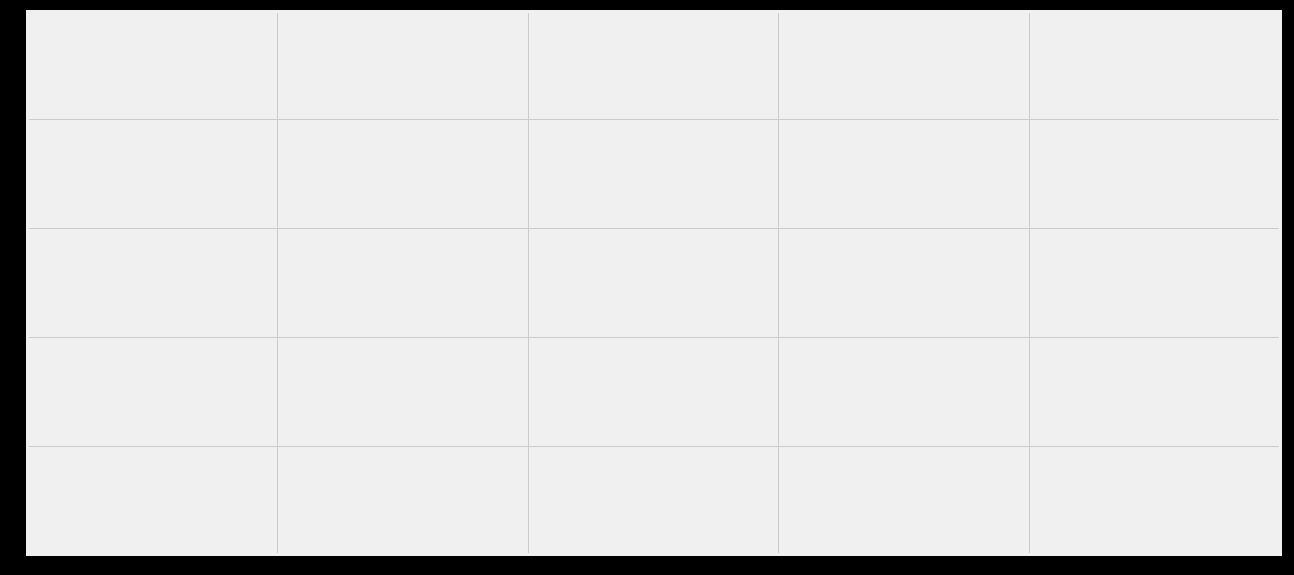

In [117]:
import numpy as np
plt.figure( figsize=(20,10), facecolor='k')
m = Basemap(projection='mill',resolution=None,llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.etopo()
xpt,ypt = m(np.array(mapdata['lon']),np.array(mapdata['lat']))
lon,lat = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'ro',markersize=np.sqrt(36)) 
plt.title('Repartition on the globe', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

In [ ]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# plot individual locations                                                                                                       
ax.plot(mapdata.lon, mapdata.lat, 'ro', transform=ccrs.PlateCarree())

# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
ax.set_extent([20, -20, 45,60])

# helper function
def get_radius(freq):
    if freq < 50:
        return 0.5
    elif freq < 200:
        return 1.2
    elif freq < 1000:
        return 1.8


# plot count of tweets per location
for i,x in locations.iteritems():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))

plt.show()

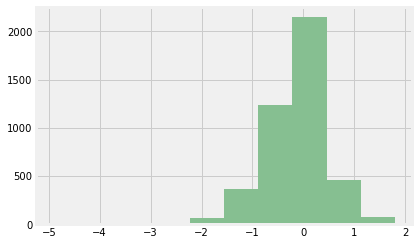

In [95]:
df['sentiment_score'].hist(color='#86bf91')

plt.title("Tweets mentioning xenophobia")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")

In [59]:
sent_clasification = pd.cut(df['sentiment_score'],\
          [-3,-1.2, 0, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'positive', 'strongly positive'])

In [60]:
sent_clasification.value_counts()

negative             2830
positive             1308
strongly negative     172
strongly positive      60
Name: sentiment_score, dtype: int64

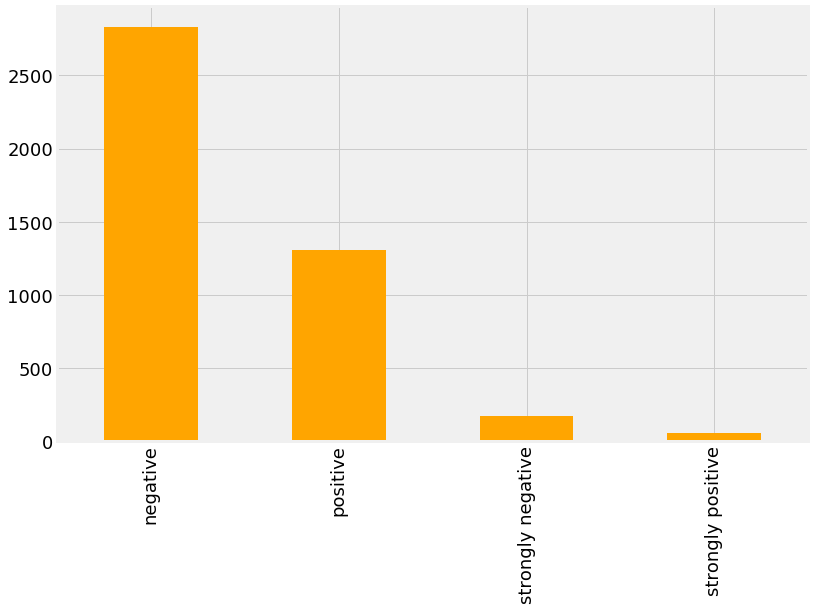

In [116]:
sent_clasification.value_counts().plot(kind='bar', color="orange", figsize=(12,8), fontsize=18)

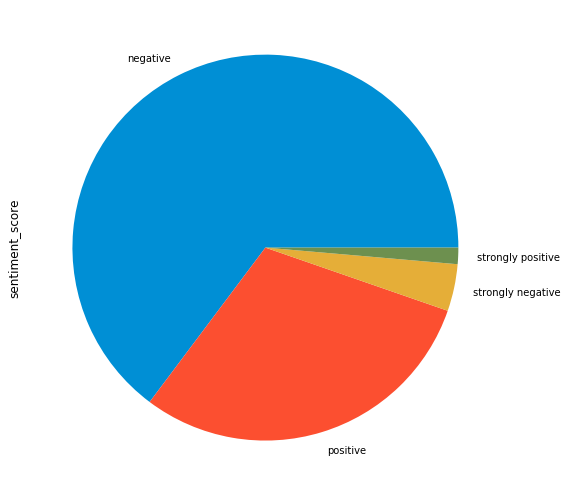

In [62]:
plt.figure(figsize=(10,7))
sent_clasification.value_counts().plot(kind='pie')
plt.grid(False)
plt.tight_layout()

### Word Cloud

Using our data, let's generate a wordcloud.

In [63]:
from wordcloud import WordCloud, STOPWORDS

In [64]:
bigstring = df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

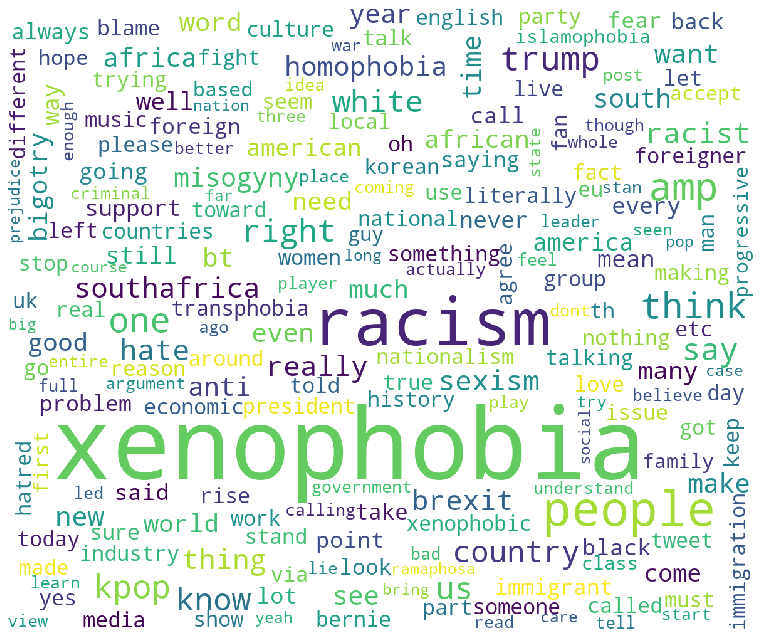

In [65]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### Top Hashtags

These are the 20 most used hashtags in our result set.

In [66]:
import re
hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [ ]:
hashtags.head(10)

Text(0.5, 0.98, 'Top 10 Hashtags for keyword: XENOPHOBIA, locale: EN')

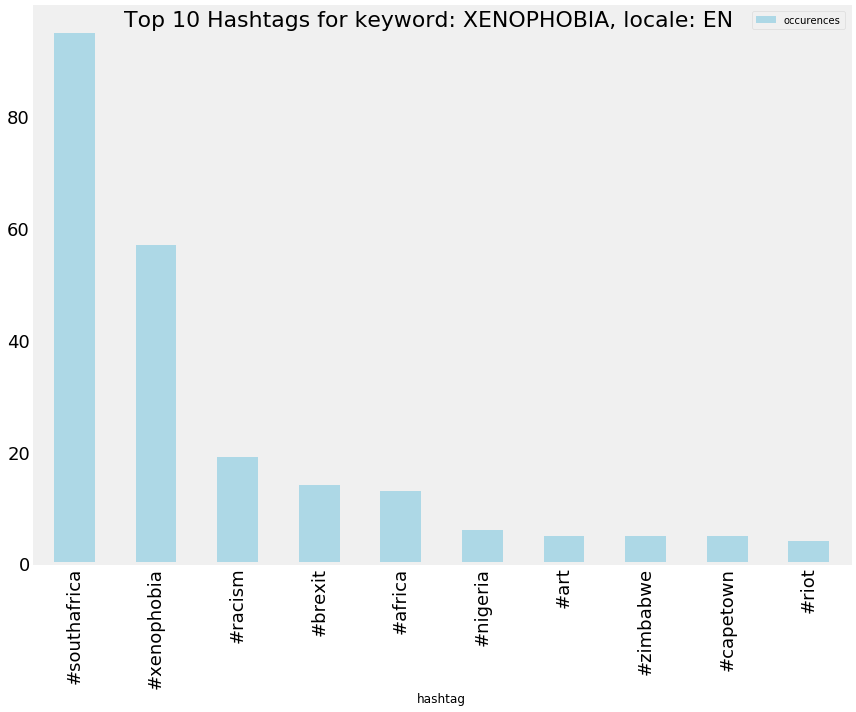

In [107]:
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag',figsize=(12,10),fontsize=18, color="lightblue")
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 10 Hashtags for keyword: XENOPHOBIA, locale: EN', fontsize=22)

### Top Users Mentioned

We are now going to plot the top 10 users that appear in tweets containing the term we've searched for.

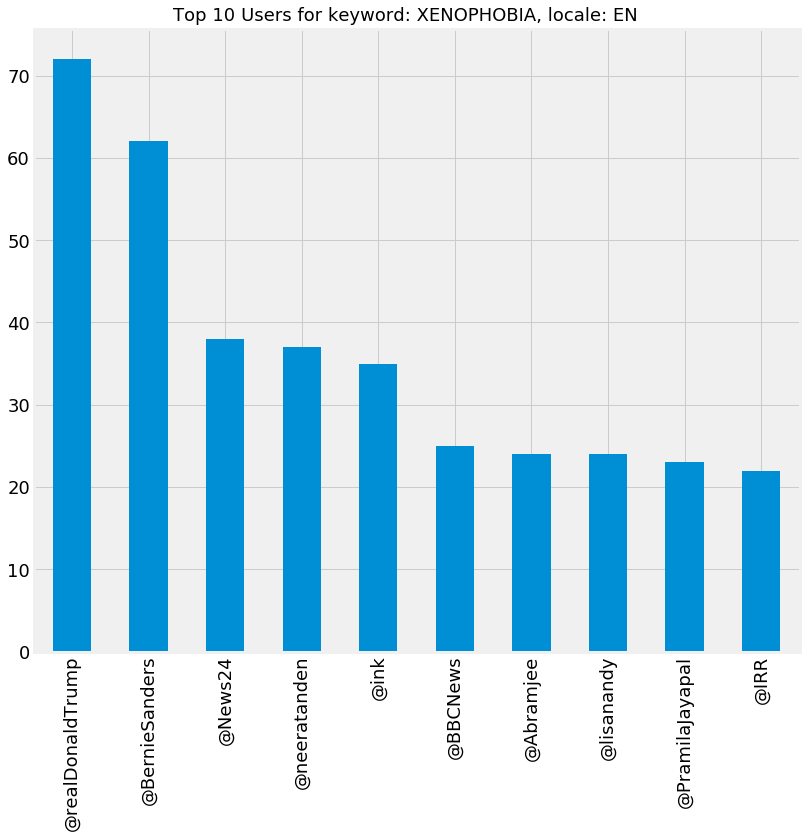

In [105]:
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Users for keyword: XENOPHOBIA, locale: EN', fontsize=18)

df['text'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar',figsize=(12,10),fontsize=18)

### Top Words

Here is a list of the 20 most used words in the tweets containing the searched term.

In [70]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [71]:
words.head(10)

,word,occurences
4713,xenophobia,841.0
3434,racism,302.0
3160,people,149.0
236,amp,102.0
2482,like,90.0
2365,kpop,72.0
4371,trump,68.0
3035,one,64.0
998,country,62.0
3803,sexism,57.0


Text(0.5, 0.98, 'Top 10 Words for keyword: XENOPHOBIA, locale: EN')

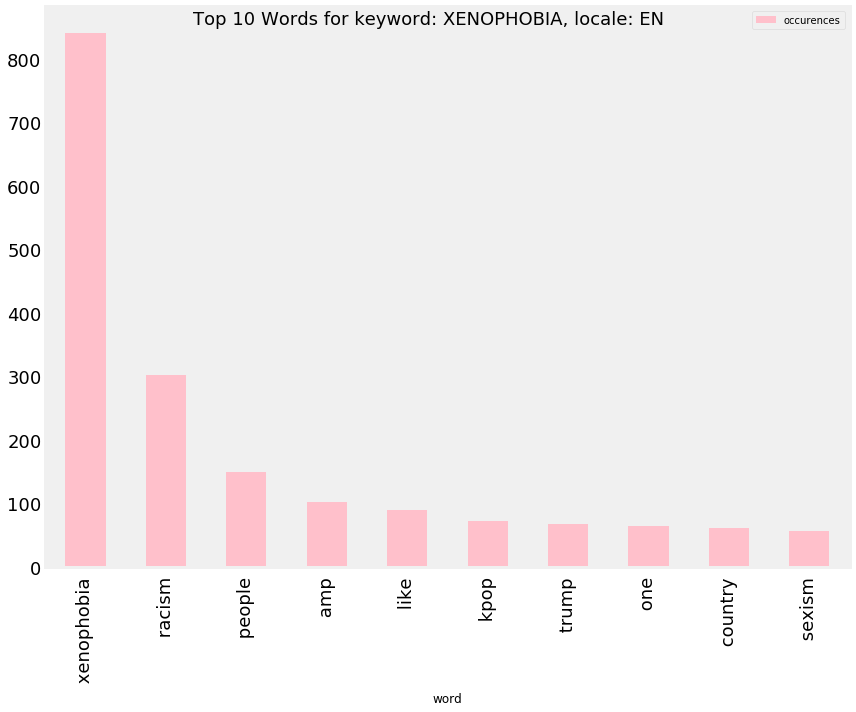

In [109]:
words[:10].plot(kind='bar',y='occurences',x='word',fontsize=18, figsize=(12,10), color="pink")
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Words for keyword: XENOPHOBIA, locale: EN', fontsize=18)

### Top Bigrams

A bigram is a pair of words. We're now going to look at the most occuring pairs of words in the result set.

In [73]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [74]:
bigramseries.head(10)

(racism, xenophobia)        274
(xenophobia, racism)        121
(racism, sexism)             56
(south, africa)              44
(sexism, xenophobia)         38
(xenophobia, amp)            31
(homophobia, xenophobia)     30
(amp, xenophobia)            28
(years, ago)                 26
(three, years)               24
dtype: int64

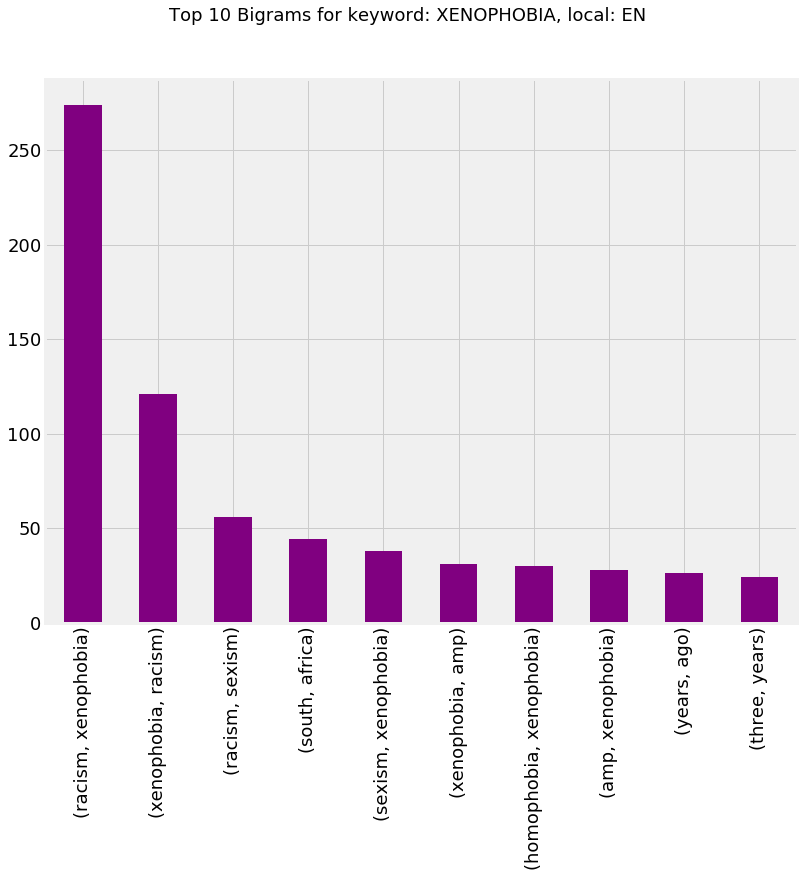

In [113]:
plt.suptitle('Top 10 Bigrams for keyword: XENOPHOBIA, local: EN', fontsize=18)
bigramseries[:10].plot(kind='bar',figsize=(12,10),fontsize=18, color="purple")

In [77]:
df.to_csv('tweets.csv')